The goal of this ML is to predict the season of the sighting based on the time and location.

In [39]:
import pandas as pd

In [40]:
df = pd.read_csv("ufo_data.csv")

create seasons column and map them

In [41]:
seasons = {1: 'winter', 2: 'winter', 3: 'spring', 4: 'spring', 5: 'spring', 6: 'summer',
           7: 'summer', 8: 'summer', 9: 'fall', 10: 'fall', 11: 'fall', 12: 'winter'}

df['Season'] = df['Month'].map(seasons)

In [42]:
df

,City,State,Country,Shape of UFO,Year,Month,Day,Hour,Minute,Season
0,Brighton/Fairfield,IA,USA,Teardrop,2023.0,4.0,8.0,19.0,30.0,spring
1,Ocean Shores,New South Wales,Australia,Triangle,2023.0,4.0,8.0,18.0,45.0,spring
2,Southampton,MA,USA,Light,2023.0,4.0,8.0,5.0,39.0,spring
3,ST BRUNO DE MONTARVILLE,Quebec,Canada,Changing,2023.0,4.0,7.0,22.0,15.0,spring
4,Bedford,VA,USA,Cube,2023.0,4.0,7.0,21.0,55.0,spring
...,...,...,...,...,...,...,...,...,...,...
127879,Interstate-5,CA,USA,Other,2023.0,4.0,28.0,1.0,0.0,spring
127880,Senji,IN,India,Flash,2021.0,6.0,22.0,1.0,0.0,summer
127881,Kentville (Canada),NS,Canada,Light,1984.0,7.0,1.0,0.0,30.0,summer
127882,Alabama,AL,USA,Diamond,2023.0,4.0,28.0,0.0,4.0,spring


Applying one hot encoding on cateogrical columns

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])
enc = OneHotEncoder(handle_unknown='ignore')
X = enc.fit_transform(df[['City']])

df['Country'] = le.fit_transform(df['Country'])
enc = OneHotEncoder(handle_unknown='ignore')
X = enc.fit_transform(df[['Country']])

df['Shape of UFO'] = le.fit_transform(df['Shape of UFO'])
enc = OneHotEncoder(handle_unknown='ignore')
X = enc.fit_transform(df[['Shape of UFO']])

df['State'] = le.fit_transform(df['State'])
enc = OneHotEncoder(handle_unknown='ignore')
X = enc.fit_transform(df[['State']])

df['Season'] = le.fit_transform(df['Season'])
enc = OneHotEncoder(handle_unknown='ignore')
X = enc.fit_transform(df[['Season']])

In [44]:
x = df.iloc[:, [2,3,4,5,6,7,8]].values
y = df.iloc[:, -1].values

Split dataset

In [45]:
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state = 0)

Feature scaling

In [46]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.fit_transform(x_test)

CLASSIFIER 1: RANDOM FOREST

In [47]:

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)
forest.fit(x_train, y_train)

y_pred_forest = forest.predict(x_test)

CLASSIFIER 2: NAIVE BAYES

In [48]:
from sklearn.naive_bayes import GaussianNB
naiveBayes = GaussianNB()
naiveBayes.fit(x_train, y_train)

y_pred_bayes = naiveBayes.predict(x_test)

CLASSIFIER 3: KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 6, metric = "minkowski", p = 2)
KNN.fit(x_train, y_train)

y_pred_knn = KNN.predict(x_test)

CLASSIFER 4: Logistic Regression 

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

Predictions

In [51]:
from sklearn.metrics import confusion_matrix
cm_forest = confusion_matrix(y_test, y_pred_forest)
cm_naive = confusion_matrix(y_test, y_pred_bayes)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_lr = confusion_matrix(y_test, y_pred_lr)

from sklearn.metrics import accuracy_score
acc_forest = accuracy_score(y_test, y_pred_forest)
acc_naive = acc_tree = accuracy_score(y_test, y_pred_bayes)
acc_knn = acc_tree = accuracy_score(y_test, y_pred_knn)
acc_lr = acc_tree = accuracy_score(y_test, y_pred_lr)

print("Accuracy of Random Forest: " + str(acc_forest))
print("Accuracy of Naive Bayes: " + str(acc_naive))
print("Accuracy of KNN: " + str(acc_knn))
print("Accuracy of Logistic Regression: " + str(acc_lr))

Accuracy of Random Forest: 1.0
Accuracy of Naive Bayes: 0.9819759940571607
Accuracy of KNN: 0.950776087891465
Accuracy of Logistic Regression: 0.7012550338194472


### Visualization

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Heatmap for Random Forest

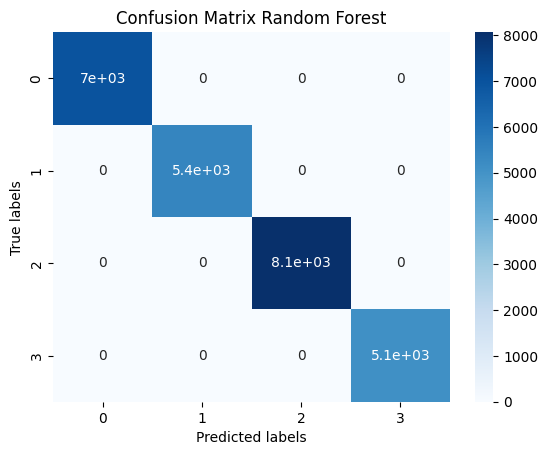

In [53]:
# Create heatmap using seaborn
sns.heatmap(cm_forest, annot=True, cmap="Blues")

# Add labels and title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix Random Forest")

# Show the plot
plt.show()

Heatmap for Naive Bayes

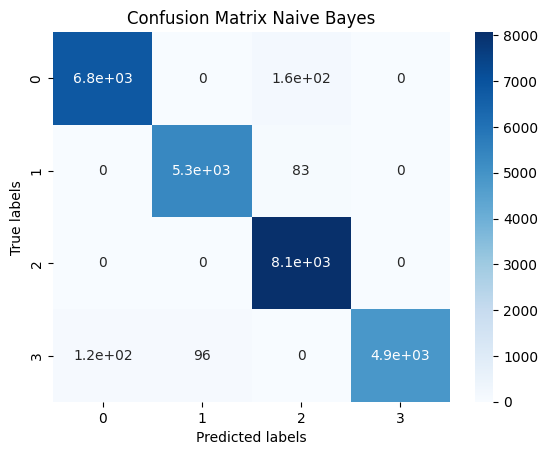

In [54]:
# Create heatmap using seaborn
sns.heatmap(cm_naive, annot=True, cmap="Blues")

# Add labels and title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix Naive Bayes")

# Show the plot
plt.show()

Heatmap for KNN

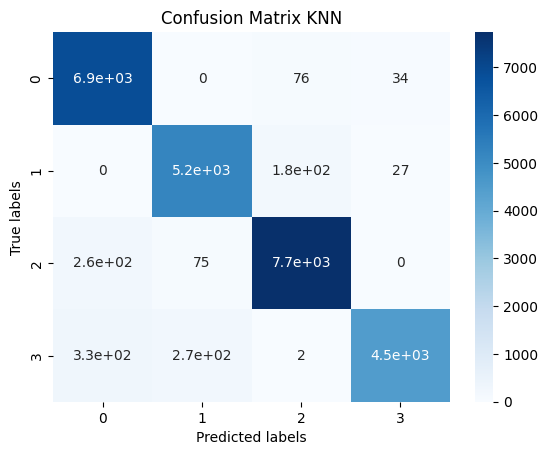

In [55]:
# Create heatmap using seaborn
sns.heatmap(cm_knn, annot=True, cmap="Blues")

# Add labels and title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix KNN")

# Show the plot
plt.show()

Heatmap for Logistic Regression

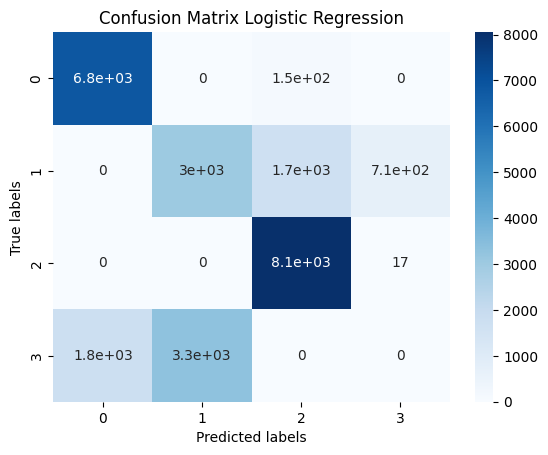

In [56]:
# Create heatmap using seaborn
sns.heatmap(cm_lr, annot=True, cmap="Blues")

# Add labels and title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix Logistic Regression")

# Show the plot
plt.show()